In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Attempt at making the code reprdoucible
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
iris = load_iris()
x = iris.data  # Features
y = iris.target  # Labels

In [4]:
encoder = OneHotEncoder(sparse_output = False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

In [5]:
scaler = MinMaxScaler(feature_range = (0, 1))
x = scaler.fit_transform(x)

In [6]:
x_train, x_, y_train, y_ = train_test_split(x, y_onehot, test_size = 0.3, random_state = seed)
x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size = 2/3, random_state = seed)

In [7]:
print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 105
Validation set size: 15
Test set size: 30


# Section 2

## Task 1: Manual Hyperparameter tuning

### Defining model architecture

In [8]:
# MLP model with the expected architecture
model = Sequential([
    Dense(16, input_shape = (4,), activation = 'relu'),  # Hidden layer
    Dense(3, activation = 'softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

### Defining the hyperparameters

In [10]:
batch_sizes = [2,  4]
lrs = [0.001, 0.00001]
epochs = [1, 3, 5]

y_test_classes = np.argmax(y_test, axis = 1)
x_test_samples = x_test[:5, :]
y_test_samples = y_test_classes[:5]

### Helper functions

In [11]:
import tabulate

# Helper function
def show_results(model, x_test_samples, y_test_samples):
    y_pred = model.predict(x_test_samples)

    table_data = []

    for i in range(len(x_test_samples)):
        sample_input = x_test_samples[i, :]
        true_value = y_test_samples[i]
        prediction = y_pred[i, :]

        table_data.append([list(sample_input), list(prediction), true_value])

    # Preparing a table
    headers = ['Input', 'Prediction', 'True Value']
    print(tabulate.tabulate(table_data, headers=headers, tablefmt="grid"))


In [12]:
show_results(model, x_test_samples, y_test_samples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
+-----------------------------------------------------------------------------------+-------------------------------------+--------------+
| Input                                                                             | Prediction                          |   True Value |
+===================================================================================+=====================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.30661574, 0.32239836, 0.3709859] |            0 |
+-----------------------------------------------------------------------------------+-------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.29306188, 0.301814, 0.4051241]   |            2 |
+-----------------------------------------------------------------------------------+-------------------------------------+----

In [13]:
import pandas as pd
df = pd.DataFrame(columns = ["batch_size", "lr", "epochs", "accuracy", "f1"])

### Manual Hyperparameter tuning

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 2
Learning Rate = 0.001
Epochs = 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Accuracy: 0.23333333333333334
F1-Score: 0.08828828828828829


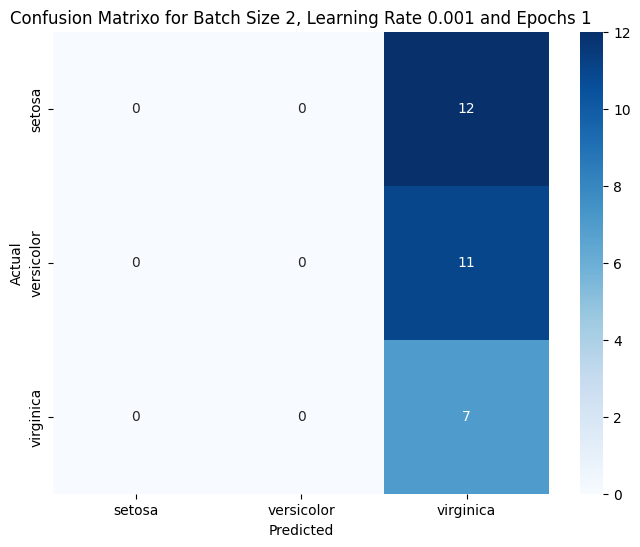


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.32318997, 0.32781738, 0.34899265] |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.21848965, 0.32670754, 0.45480278] |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

<ipython-input-14-a61b5a65f8fe>:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, a], ignore_index = True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 2
Learning Rate = 0.001
Epochs = 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Accuracy: 0.4
F1-Score: 0.38503770739064863


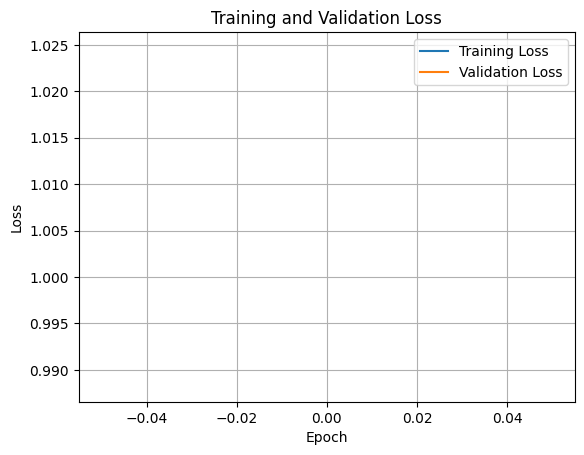

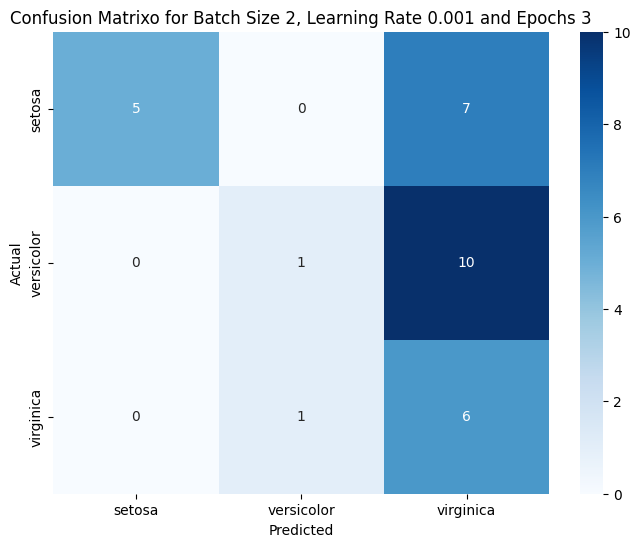


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.35491744, 0.30139956, 0.343683]   |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.2704589, 0.34081003, 0.38873103]  |            2 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.666666666666666

---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 2
Learning Rate = 0.001
Epochs = 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Accuracy: 0.6333333333333333
F1-Score: 0.5306666666666666


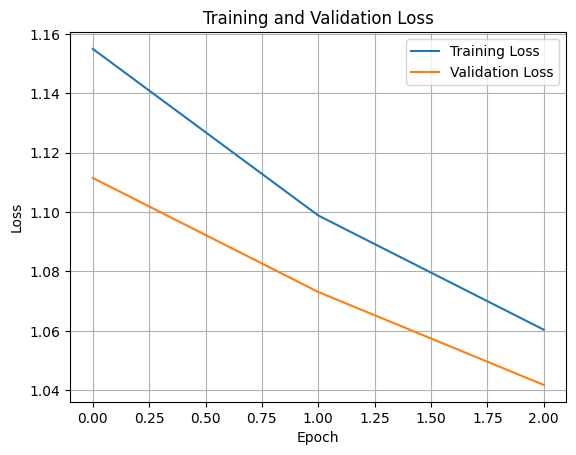

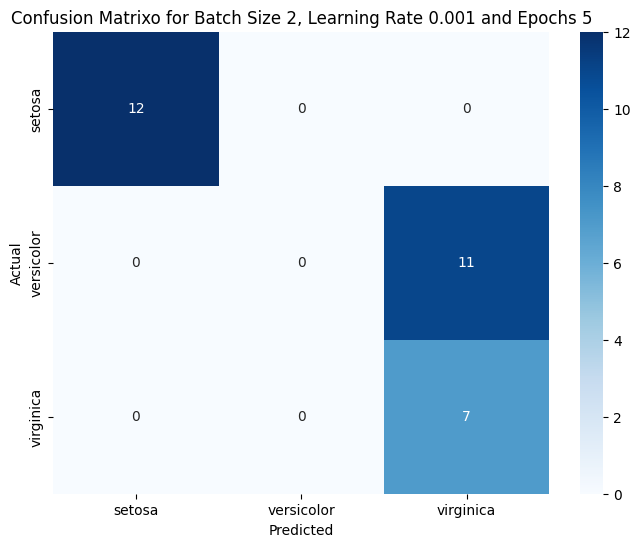


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.5151218, 0.2129431, 0.27193508]   |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.15070327, 0.37654042, 0.4727564]  |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 2
Learning Rate = 1e-05
Epochs = 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Accuracy: 0.23333333333333334
F1-Score: 0.08828828828828829


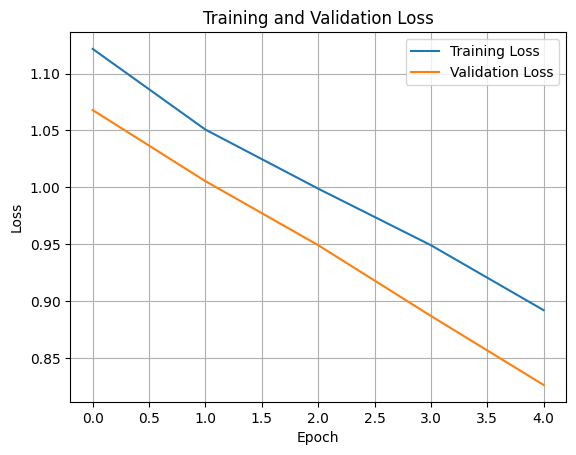

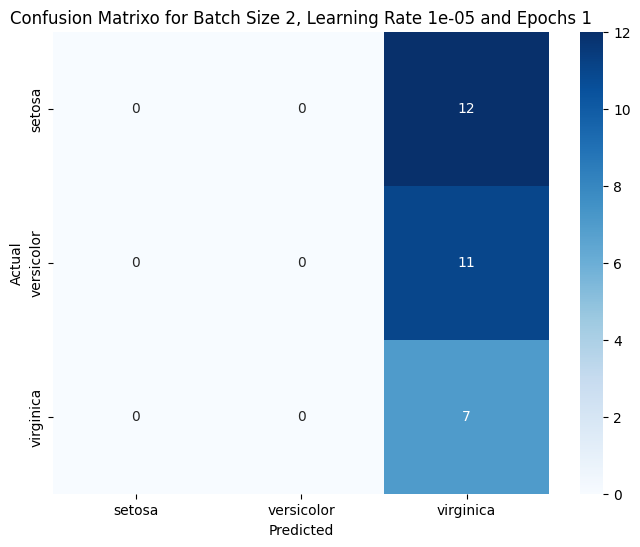


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.2306005, 0.36725265, 0.40214682]  |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.24372871, 0.31636152, 0.43990973] |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 2
Learning Rate = 1e-05
Epochs = 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy: 0.4666666666666667
F1-Score: 0.33948717948717955


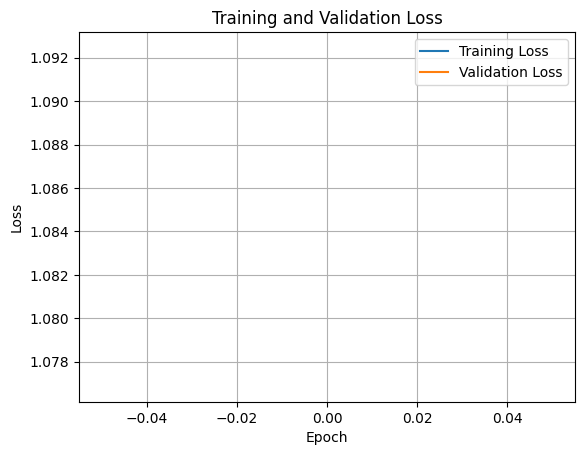

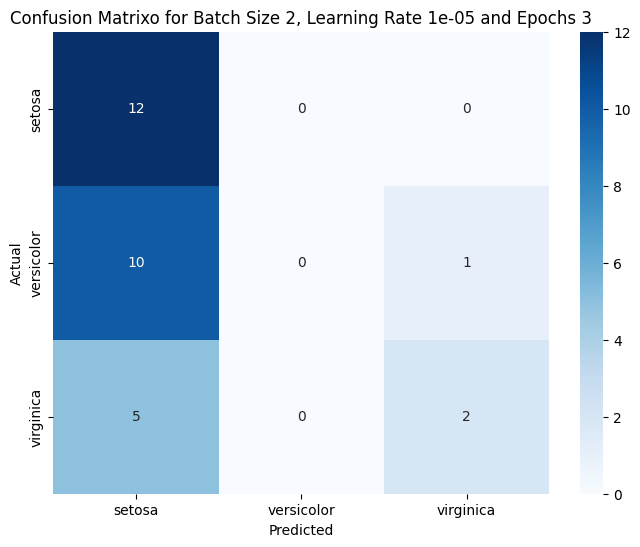


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.40268704, 0.33877304, 0.25853992] |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.37240073, 0.28520277, 0.34239647] |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 2
Learning Rate = 1e-05
Epochs = 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Accuracy: 0.23333333333333334
F1-Score: 0.15555555555555556


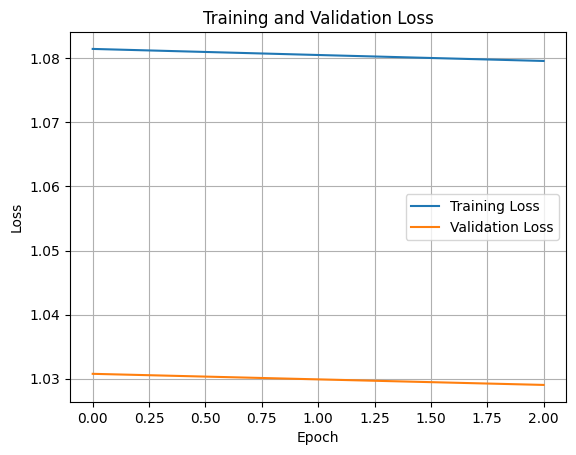

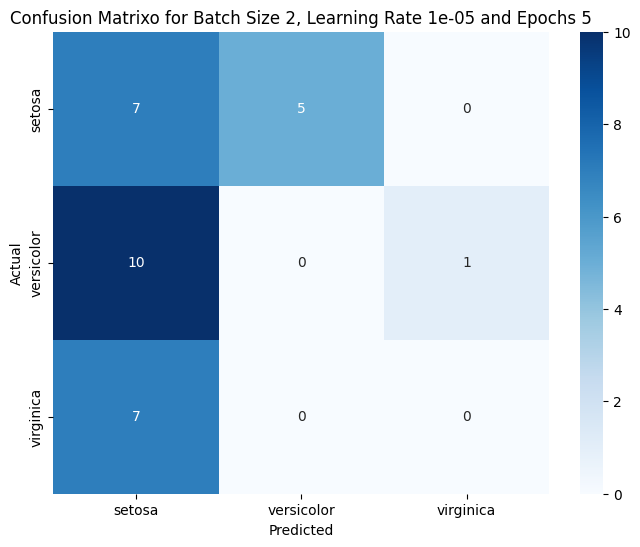


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.3318398, 0.35583586, 0.31232437]  |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.46326074, 0.1848827, 0.35185653]  |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 4
Learning Rate = 0.001
Epochs = 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Accuracy: 0.36666666666666664
F1-Score: 0.1967479674796748


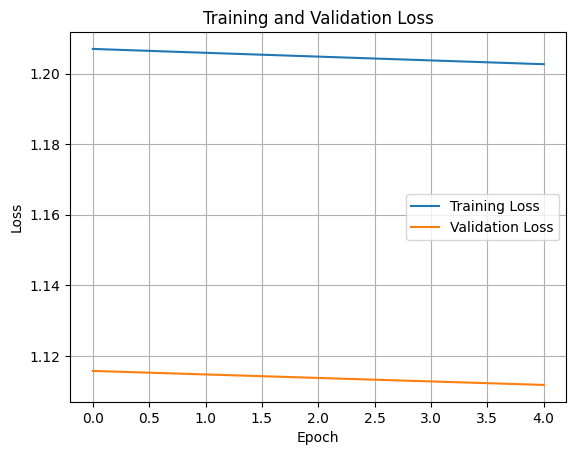

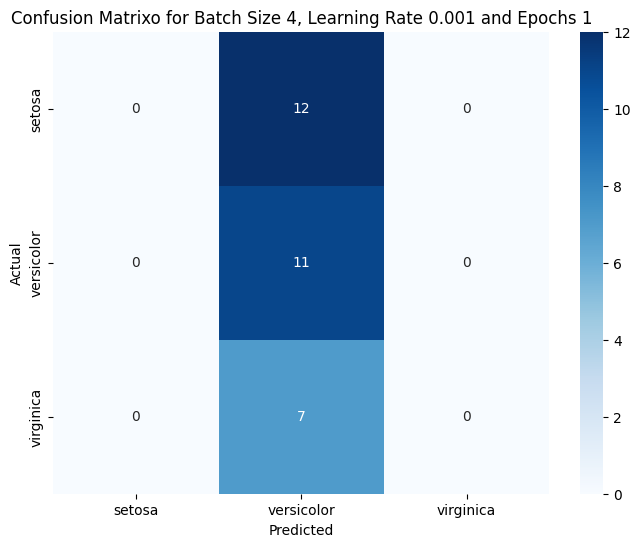


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.27635518, 0.46136308, 0.26228172] |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.18036419, 0.48709935, 0.3325364]  |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 4
Learning Rate = 0.001
Epochs = 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Accuracy: 0.26666666666666666
F1-Score: 0.15227920227920227


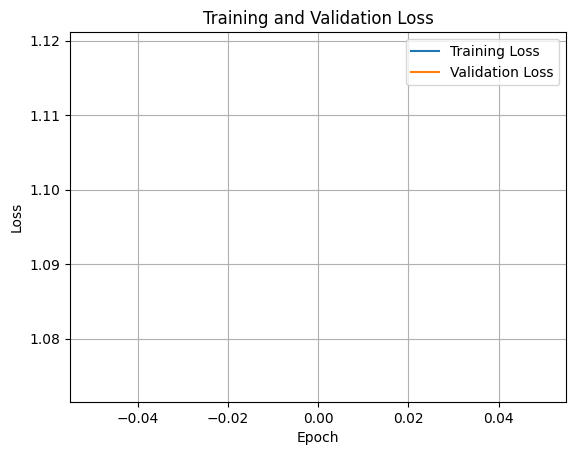

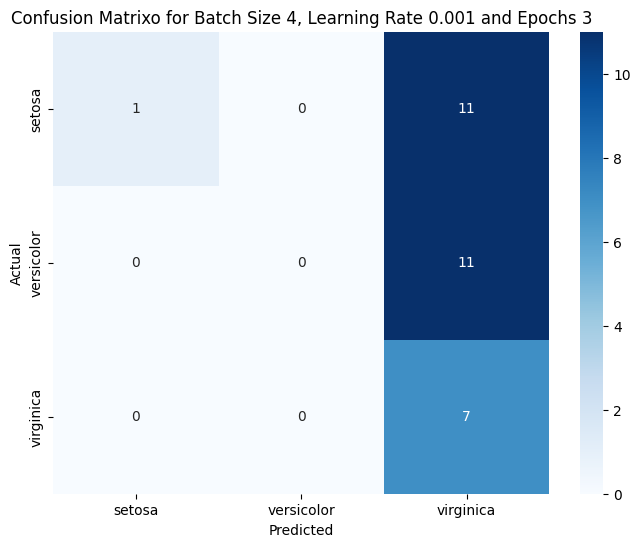


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.37589416, 0.22567324, 0.39843252] |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.26186812, 0.28783396, 0.45029786] |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 4
Learning Rate = 0.001
Epochs = 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 0.6333333333333333
F1-Score: 0.5306666666666666


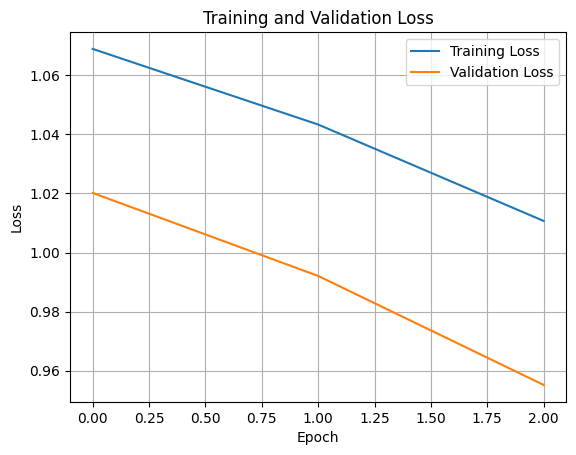

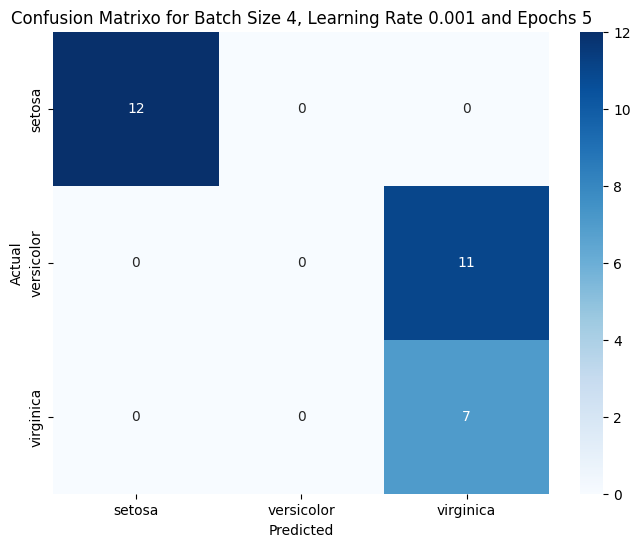


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
+-----------------------------------------------------------------------------------+-------------------------------------+--------------+
| Input                                                                             | Prediction                          |   True Value |
+===================================================================================+=====================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.606851, 0.1925843, 0.20056465]   |            0 |
+-----------------------------------------------------------------------------------+-------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.13010128, 0.3256576, 0.54424113] |            2 |
+-----------------------------------------------------------------------------------+-------------------------------------+----

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 4
Learning Rate = 1e-05
Epochs = 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 0.4
F1-Score: 0.22857142857142856


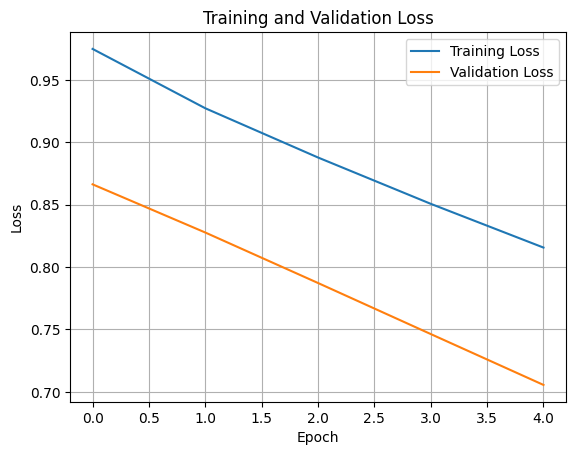

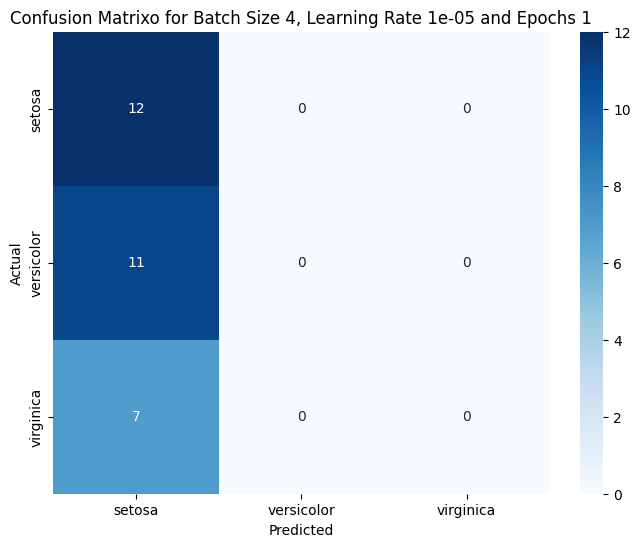


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.44128203, 0.2863821, 0.27233586]  |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.53502524, 0.29823652, 0.16673827] |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 4
Learning Rate = 1e-05
Epochs = 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Accuracy: 0.2
F1-Score: 0.08


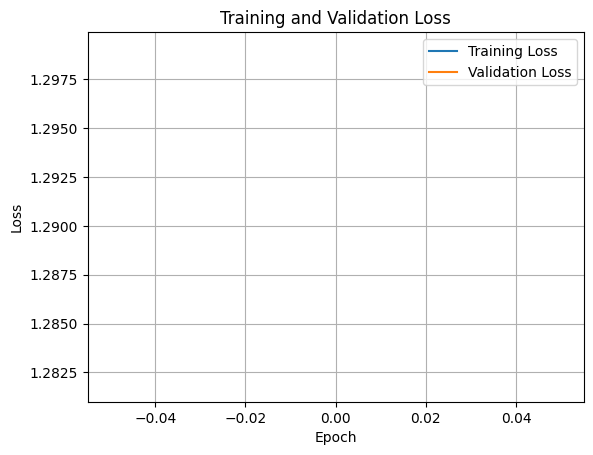

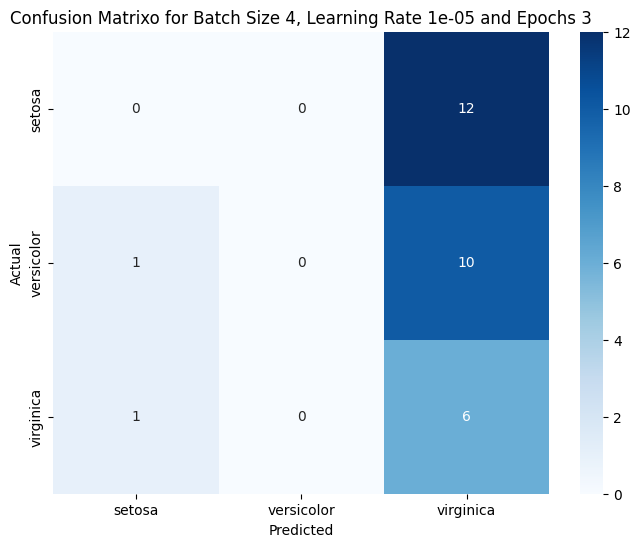


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.328935, 0.27457073, 0.39649424]   |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.36070782, 0.24041061, 0.3988816]  |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------
Model details: 
Batch size = 4
Learning Rate = 1e-05
Epochs = 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Accuracy: 0.7666666666666667
F1-Score: 0.67816091954023


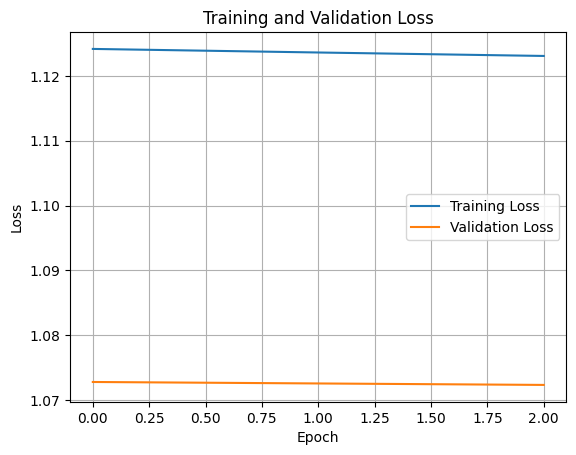

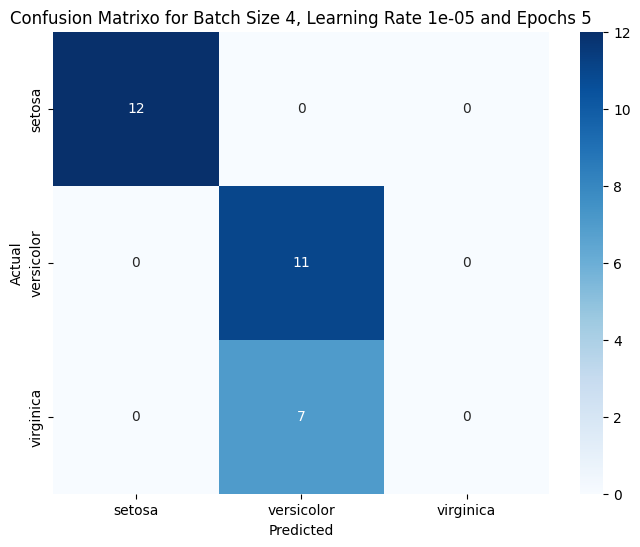


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| Input                                                                             | Prediction                           |   True Value |
+===================================================================================+======================================+==============+
| [0.25, 0.8749999999999998, 0.0847457627118644, 0.0]                               | [0.37684098, 0.33896682, 0.2841922]  |            0 |
+-----------------------------------------------------------------------------------+--------------------------------------+--------------+
| [0.6666666666666667, 0.41666666666666674, 0.711864406779661, 0.9166666666666666]  | [0.24869846, 0.44713598, 0.30416557] |            2 |
+-----------------------------------------------------------------------------------+------------------------------------

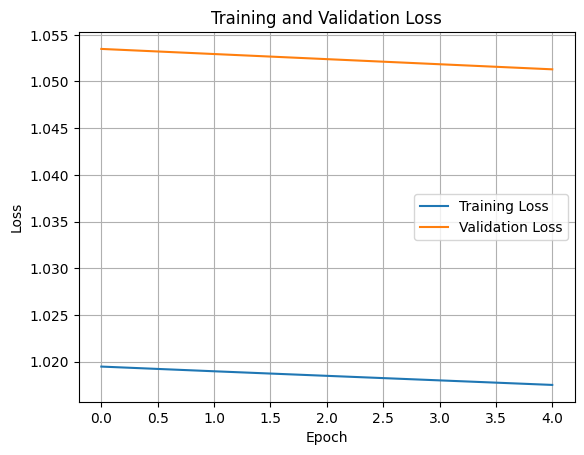

In [14]:
for batch_size in batch_sizes:
    for lr in lrs:
        for epoch in epochs:
            # Re-init the model
            model = Sequential([
                    Dense(16, input_shape = (4,), activation = 'relu'),  # Hidden layer
                    Dense(3, activation = 'softmax')  # Output layer
                ])

            model.compile(optimizer = Adam(learning_rate = lr),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

            # Training
            history = model.fit(x_train, y_train,
                                epochs = epoch,
                                batch_size = batch_size,
                                validation_data = (x_val, y_val),
                                verbose = 0)

            # Logging and evaluating
            print("---------------------------------------------------------------------------------------------------")
            print(f"Model details: \nBatch size = {batch_size}\nLearning Rate = {lr}\nEpochs = {epoch}\n")
            # Evaluating over the test set
            y_pred = model.predict(x_test)
            y_pred_classes = np.argmax(y_pred, axis = 1)

            print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_classes)}")
            print(f"F1-Score: {f1_score(y_test_classes, y_pred_classes, average = 'weighted')}")

            # Plotting the confusion matrix
            conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

            # Plot confusion matrix using matplotlib (seaborn is used to generate heatmap)
            plt.figure(figsize = (8, 6))
            sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
                        xticklabels = iris.target_names, yticklabels = iris.target_names)
            plt.title(f'Confusion Matrixo for Batch Size {batch_size}, Learning Rate {lr} and Epochs {epoch}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

            # Plot the losses for a given hyperparamter configuration
            plt.plot(history.history['loss'], label = 'Training Loss')
            plt.grid(True)
            plt.plot(history.history['val_loss'], label = 'Validation Loss')
            plt.title(f'Training and Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            print()
            # print("------------------- 5 test samples -------------------")
            show_results(model, x_test_samples, y_test_samples)
            # print("---------------------------------------------------------------------------------------------------")

            a = pd.DataFrame([[batch_size, lr, epoch, accuracy_score(y_test_classes, y_pred_classes), f1_score(y_test_classes, y_pred_classes, average = 'weighted')]],
                             columns=["batch_size", "lr", "epochs", "accuracy", "f1"])
            df = pd.concat([df, a], ignore_index = True)
            del model

In [15]:
df.sort_values(by = "accuracy", ascending = False)

,batch_size,lr,epochs,accuracy,f1
11,4,0.00001,5,0.766667,0.678161
2,2,0.00100,5,0.633333,0.530667
8,4,0.00100,5,0.633333,0.530667
4,2,0.00001,3,0.466667,0.339487
1,2,0.00100,3,0.400000,0.385038
9,4,0.00001,1,0.400000,0.228571
6,4,0.00100,1,0.366667,0.196748
7,4,0.00100,3,0.266667,0.152279
0,2,0.00100,1,0.233333,0.088288
3,2,0.00001,1,0.233333,0.088288


As we can see, the test set metrics are best for the case where we train the MLP using a Batch size of 2, with a learning rate of 0.001 for 3 epochs

## Task 2: Automated Hyperparameter Search

In [16]:
!pip install autogluon autogluon.core autogluon.tabular scikit-learn -qU

In [17]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size = 4, hidden_size = 16, output_size = 3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)


In [18]:
!pip install scikit-learn -qU

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-tabular 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-core 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.


In [19]:
import autogluon

In [20]:
from autogluon.tabular import TabularPredictor, TabularDataset
from autogluon.common import space

In [21]:
model = Model()
torch.save(model, 'model.pth')

In [22]:
def prepare_autogluon_data(features, labels_onehot):
    """Convert numpy arrays to AutoGluon TabularDataset"""
    df = pd.DataFrame(features, columns=iris.feature_names)
    df['label'] = np.argmax(labels_onehot, axis = 1)
    return TabularDataset(df)

# Create datasets
train_data = prepare_autogluon_data(x_train, y_train)
val_data = prepare_autogluon_data(x_val, y_val)
test_data = prepare_autogluon_data(x_test, y_test)

# Verify dataset shapes
print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (105, 5)
Validation data shape: (15, 5)
Test data shape: (30, 5)


### RandomSearch

In [23]:
predictor = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = r"/content/models/random",
    verbosity = 2
)

In [24]:
hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'random'
}

In [25]:
predictor.fit(
    train_data,
    hyperparameters={
        'NN_TORCH': {
            'num_epochs': space.Categorical(1, 3, 5),
            'learning_rate': space.Categorical(0.001, 0.00001),
            'batch_size': space.Categorical(2, 4),
            'activation': 'relu',
            'optimizer': 'adam'
        }
    },

    time_limit = 600,
    presets = 'medium_quality_faster_train',
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.96 GB / 12.67 GB (86.5%)
Disk Space Avail:   70.99 GB / 107.72 GB (65.9%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/random"
Train Data Rows:    105
Train Data Columns: 4
Label Column:       label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify 

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/random/models/NeuralNetTorch


Fitted model: NeuralNetTorch/e5507_00000 ...
	0.8571	 = Validation score   (accuracy)
	5.15s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e5507_00001 ...
	0.9524	 = Validation score   (accuracy)
	7.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/e5507_00002 ...
	0.6667	 = Validation score   (accuracy)
	3.77s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e5507_00003 ...
	0.9048	 = Validation score   (accuracy)
	4.07s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/e5507_00004 ...
	0.9048	 = Validation score   (accuracy)
	3.98s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e5507_00005 ...
	0.9524	 = Validation score   (accuracy)
	4.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/e5507_00006 ...
	0.7143	 = Validation score   (accuracy)
	5.86s	 = Training   runtime
	0.0s	 = Validation run

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 531.08s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/e5507_00001': 1.0}
	0.9524	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 68.96s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1124.8 rows/s (21 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/random")


In [26]:
y_pred = predictor.predict(test_data)

y_true = test_data['label']
f1 = f1_score(y_true, y_pred, average = "weighted")
accuracy = accuracy_score(y_true, y_pred)

print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

if len(predictor.model_names()) > 0:
    df_random = predictor.fit_summary()
else:
    pass

F1-score: 1.0
Accuracy: 1.0
*** Summary of fit() ***
Estimated performance of each model:
                         model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetTorch/e5507_00005   0.952381    accuracy       0.003586  4.182706                0.003586           4.182706            1       True          6
1   NeuralNetTorch/e5507_00001   0.952381    accuracy       0.017598  7.312937                0.017598           7.312937            1       True          2
2          WeightedEnsemble_L2   0.952381    accuracy       0.018671  7.319650                0.001073           0.006713            2       True         11
3   NeuralNetTorch/e5507_00007   0.904762    accuracy       0.003456  6.184803                0.003456           6.184803            1       True          8
4   NeuralNetTorch/e5507_00003   0.904762    accuracy       0.003492  4.072911                0.003492           4.072911    

In [27]:
df_random

{'model_types': {'NeuralNetTorch/e5507_00000': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00001': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00002': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00003': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00004': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00005': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00006': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00007': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00008': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00009': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/e5507_00000': 0.8571428571428571,
  'NeuralNetTorch/e5507_00001': 0.9523809523809523,
  'NeuralNetTorch/e5507_00002': 0.6666666666666666,
  'NeuralNetTorch/e5507_00003': 0.9047619047619048,
  'NeuralNetTorch/e5507_00004': 0.9047619047619048,
  'NeuralNetTorch/e5507_00005': 0

In [28]:
results = predictor.leaderboard(test_data, extra_metrics=['f1_macro'])

hp_list = []
for model_name in results['model']:
    model_obj = predictor._trainer.load_model(model_name)
    info = model_obj.get_info()
    hp = info.get('hyperparameters', {})
    hp_list.append({k: hp[k] for k in ['num_epochs', 'batch_size', 'learning_rate'] if k in hp})

results['hyperparameters'] = hp_list


results = results[['model', 'score_val', 'f1_macro', 'hyperparameters']]
results.columns = ['Configuration', 'Accuracy', 'F1 Macro', 'Hyperparameters']

results

,Configuration,Accuracy,F1 Macro,Hyperparameters
0,NeuralNetTorch/e5507_00005,0.952381,1.000000,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
1,NeuralNetTorch/e5507_00001,0.952381,1.000000,"{'num_epochs': 5, 'batch_size': 2, 'learning_r..."
2,WeightedEnsemble_L2,0.952381,1.000000,{}
3,NeuralNetTorch/e5507_00003,0.904762,0.961905,"{'num_epochs': 3, 'batch_size': 2, 'learning_r..."
4,NeuralNetTorch/e5507_00007,0.904762,0.961905,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
5,NeuralNetTorch/e5507_00004,0.904762,0.851852,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
6,NeuralNetTorch/e5507_00008,0.857143,0.775000,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
7,NeuralNetTorch/e5507_00009,0.857143,0.775000,"{'num_epochs': 1, 'batch_size': 4, 'learning_r..."
8,NeuralNetTorch/e5507_00000,0.857143,0.775000,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
9,NeuralNetTorch/e5507_00002,0.666667,0.749206,"{'num_epochs': 1, 'batch_size': 4, 'learning_r..."


### Grid

In [29]:
from itertools import product

# search space
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

nn_configs = [
    {'num_epochs': e, 'learning_rate': lr, 'batch_size': bs, 'activation': 'relu', 'optimizer': 'adam'}
    for e, lr, bs in product(epochs, learning_rates, batch_sizes)
]

print(nn_configs)

[{'num_epochs': 1, 'learning_rate': 0.001, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 1, 'learning_rate': 0.001, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 1, 'learning_rate': 1e-05, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 1, 'learning_rate': 1e-05, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 0.001, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 0.001, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 1e-05, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 1e-05, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 5, 'learning_rate': 0.001, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 5, 'learning_rate': 0.001, 'batch_size': 4, 'activation':

In [30]:
predictor_grid = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = "/content/models/grid",
    verbosity = 2
)

In [31]:
predictor_grid.fit(
    train_data,
    hyperparameters = {"NN_TORCH": nn_configs},

    time_limit = 600,
    presets = 'medium_quality_faster_train',
    raise_on_no_models_fitted = True
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.26 GB / 12.67 GB (81.0%)
Disk Space Avail:   70.96 GB / 107.72 GB (65.9%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/grid"
Train Data Rows:    105
Train Data Columns: 4
Label Column:       label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify pr

In [32]:
y_pred = predictor_grid.predict(test_data)

y_true = test_data['label']
f1 = f1_score(y_true, y_pred, average="weighted")
accuracy = accuracy_score(y_true, y_pred)

print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

if len(predictor.model_names()) > 0:
    df_grid = predictor.fit_summary()
else:
    pass

F1-score: 0.9009287925696595
Accuracy: 0.9
*** Summary of fit() ***
Estimated performance of each model:
                         model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetTorch/e5507_00005   0.952381    accuracy       0.003586  4.182706                0.003586           4.182706            1       True          6
1   NeuralNetTorch/e5507_00001   0.952381    accuracy       0.017598  7.312937                0.017598           7.312937            1       True          2
2          WeightedEnsemble_L2   0.952381    accuracy       0.018671  7.319650                0.001073           0.006713            2       True         11
3   NeuralNetTorch/e5507_00007   0.904762    accuracy       0.003456  6.184803                0.003456           6.184803            1       True          8
4   NeuralNetTorch/e5507_00003   0.904762    accuracy       0.003492  4.072911                0.003492        

In [33]:
df_grid

{'model_types': {'NeuralNetTorch/e5507_00000': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00001': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00002': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00003': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00004': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00005': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00006': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00007': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00008': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00009': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/e5507_00000': 0.8571428571428571,
  'NeuralNetTorch/e5507_00001': 0.9523809523809523,
  'NeuralNetTorch/e5507_00002': 0.6666666666666666,
  'NeuralNetTorch/e5507_00003': 0.9047619047619048,
  'NeuralNetTorch/e5507_00004': 0.9047619047619048,
  'NeuralNetTorch/e5507_00005': 0

In [34]:
results_grid = predictor_grid.leaderboard(test_data, extra_metrics=['f1_macro'])

hp_list = []
for model_name in results_grid['model']:
    model_obj = predictor_grid._trainer.load_model(model_name)
    info = model_obj.get_info()
    hp = info.get('hyperparameters', {})
    hp_list.append({k: hp[k] for k in ['num_epochs', 'batch_size', 'learning_rate'] if k in hp})

results_grid['hyperparameters'] = hp_list


results_grid = results_grid[['model', 'score_val', 'f1_macro', 'hyperparameters']]
results_grid.columns = ['Configuration', 'Accuracy', 'F1 Macro', 'Hyperparameters']

results_grid

,Configuration,Accuracy,F1 Macro,Hyperparameters
0,NeuralNetTorch_9,0.904762,1.000000,"{'num_epochs': 5, 'batch_size': 2, 'learning_r..."
1,NeuralNetTorch_5,0.904762,1.000000,"{'num_epochs': 3, 'batch_size': 2, 'learning_r..."
2,NeuralNetTorch_10,0.952381,0.888545,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
3,NeuralNetTorch_6,0.952381,0.888545,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
4,WeightedEnsemble_L2,0.952381,0.888545,{}
5,NeuralNetTorch_2,0.857143,0.733333,"{'num_epochs': 1, 'batch_size': 4, 'learning_r..."
6,NeuralNetTorch,0.619048,0.583333,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
7,NeuralNetTorch_8,0.476190,0.430335,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
8,NeuralNetTorch_3,0.476190,0.395238,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
9,NeuralNetTorch_12,0.523810,0.411594,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."


### HyperBand

This no longer works as the support for this has been dropped in recent versions, we could instead use a slightly different approach

In [35]:
# fit_config = {
#     'num_trials': 12,
#     'scheduler': 'hyperband',
#     'searcher': 'random',
#     'max_t': 5, # max epochs per config
#     'brackets': 3 # number of consecutive halving steps
# }

# predictor_hb = TabularPredictor(
#     label = 'label',
#     eval_metric = 'accuracy',
#     path = "/content/models/hb",
#     verbosity = 2
# )

# predictor_hb.fit(
#     train_data,
#     hyperparameters = {
#         'NN_TORCH': {
#             'num_epochs': space.Categorical(1, 3, 5),
#             'learning_rate': space.Categorical(0.001, 0.00001),
#             'batch_size': space.Categorical(2, 4),
#             'activation': 'relu',
#             'optimizer': 'adam'
#         }
#     },

#     time_limit = 600,
#     presets = 'medium_quality_faster_train',
#     hyperparameter_tune_kwargs = fit_config,
#     raise_on_no_models_fitted = True
# )

Modified approach

In [36]:
from ray import tune

def train_func(config):
    hyperparameters = {'NN_TORCH': config}
    predictor = TabularPredictor(label = 'label',
                                 eval_metric = 'accuracy',
                                 path = '/content/models/hyperband',
                                 verbosity = 2)

    # Fit the model
    predictor.fit(
        train_data,
        hyperparameters = hyperparameters,
        time_limit = 600,
        presets = 'medium_quality_faster_train'
    )

    results = predictor.evaluate(val_data, auxiliary_metrics = False)

    tune.report(metric = results['accuracy'])

In [37]:
config = {
    'num_epochs': tune.choice([1, 3, 5]),
    'learning_rate': tune.choice([1e-3, 1e-5]),
    'batch_size': tune.choice([2, 4]),
    'activation': 'relu',
    'optimizer': 'adam'
}

In [38]:
analysis = tune.run(
    train_func,
    config = config,
    scheduler = tune.schedulers.HyperBandScheduler(metric='metric', mode='max'),
    num_samples = 15,
    raise_on_failed_trial = False
)

+-------------------------------------------------------------------+
| Configuration for experiment     train_func_2025-02-26_19-23-00   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        HyperBandScheduler               |
| Number of trials                 15                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_func_2025-02-26_19-23-00
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts`

Trial status: 15 PENDING
Current time: 2025-02-26 19:23:00. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------------------------------------------------+
| Trial name       

2025-02-26 19:23:10,998	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00000 errored after 0 iterations at 2025-02-26 19:23:11. Total running time: 10s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00000_0_batch_size=2,learning_rate=0.0000,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:23:11,249	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00001
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00001 errored after 0 iterations at 2025-02-26 19:23:11. Total running time: 10s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00001_1_batch_size=2,learning_rate=0.0010,num_epochs=3_2025-02-26_19-23-00/error.txt

Trial train_func_177c0_00002 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00002 config           |
+-----------------------------------------------+
| activation                               relu |
| batch_size                                  4 |
| learning_rate                           0.001 |
| num_epochs                                  1 |
| optimizer                                adam |
+-----------------------------------------------+

Trial train_func_177c0_00003 started with configuration:
+-------------------------------------------------+
| Trial train_func_177c0_00003 conf

2025-02-26 19:23:22,302	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00002
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00002 errored after 0 iterations at 2025-02-26 19:23:22. Total running time: 21s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00002_2_batch_size=4,learning_rate=0.0010,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:23:22,643	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00003
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00003 errored after 0 iterations at 2025-02-26 19:23:22. Total running time: 22s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00003_3_batch_size=4,learning_rate=0.0000,num_epochs=1_2025-02-26_19-23-00/error.txt

Trial train_func_177c0_00004 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00004 config           |
+-----------------------------------------------+
| activation                               relu |
| batch_size                                  4 |
| learning_rate                           0.001 |
| num_epochs                                  1 |
| optimizer                                adam |
+-----------------------------------------------+

Trial train_func_177c0_00005 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00005 config

2025-02-26 19:23:31,267	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00004
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00004 errored after 0 iterations at 2025-02-26 19:23:31. Total running time: 30s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00004_4_batch_size=4,learning_rate=0.0010,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:23:34,343	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00005
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00005 errored after 0 iterations at 2025-02-26 19:23:34. Total running time: 33s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00005_5_batch_size=4,learning_rate=0.0010,num_epochs=5_2025-02-26_19-23-00/error.txt

Trial train_func_177c0_00006 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00006 config           |
+-----------------------------------------------+
| activation                               relu |
| batch_size                                  2 |
| learning_rate                           0.001 |
| num_epochs                                  1 |
| optimizer                                adam |
+-----------------------------------------------+

Trial train_func_177c0_00007 started with configuration:
+-------------------------------------------------+
| Trial train_func_177c0_00007 conf

2025-02-26 19:23:41,813	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00006
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00006 errored after 0 iterations at 2025-02-26 19:23:41. Total running time: 41s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00006_6_batch_size=2,learning_rate=0.0010,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:23:44,969	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00007
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00007 errored after 0 iterations at 2025-02-26 19:23:44. Total running time: 44s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00007_7_batch_size=2,learning_rate=0.0000,num_epochs=3_2025-02-26_19-23-00/error.txt

Trial train_func_177c0_00008 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00008 config           |
+-----------------------------------------------+
| activation                               relu |
| batch_size                                  2 |
| learning_rate                           0.001 |
| num_epochs                                  1 |
| optimizer                                adam |
+-----------------------------------------------+

Trial train_func_177c0_00009 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00009 config

2025-02-26 19:23:53,929	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00008
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00008 errored after 0 iterations at 2025-02-26 19:23:53. Total running time: 53s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00008_8_batch_size=2,learning_rate=0.0010,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:23:56,292	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00009
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00009 errored after 0 iterations at 2025-02-26 19:23:56. Total running time: 55s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00009_9_batch_size=4,learning_rate=0.0010,num_epochs=3_2025-02-26_19-23-00/error.txt

Trial status: 10 ERROR | 5 PENDING
Current time: 2025-02-26 19:24:00. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+-----------------------------------------------------------------------------------+
| Trial name               status       num_epochs     learning_rate     batch_size |
+-----------------------------------------------------------------------------------+
| train_func_177c0_00010   PENDING               5             1e-05              2 |
| train_func_177c0_00011   PENDING               1             1e-05              2 |
| train_func_177c0_00012   PENDING               1             0.001           

2025-02-26 19:24:06,273	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00011
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00011 errored after 0 iterations at 2025-02-26 19:24:06. Total running time: 1min 5s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00011_11_batch_size=2,learning_rate=0.0000,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:24:06,747	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00010
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00010 errored after 0 iterations at 2025-02-26 19:24:06. Total running time: 1min 6s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00010_10_batch_size=2,learning_rate=0.0000,num_epochs=5_2025-02-26_19-23-00/error.txt

Trial train_func_177c0_00012 started with configuration:
+-----------------------------------------------+
| Trial train_func_177c0_00012 config           |
+-----------------------------------------------+
| activation                               relu |
| batch_size                                  2 |
| learning_rate                           0.001 |
| num_epochs                                  1 |
| optimizer                                adam |
+-----------------------------------------------+

Trial train_func_177c0_00013 started with configuration:
+-------------------------------------------------+
| Trial train_func_177c0_00013

2025-02-26 19:24:17,677	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00012
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00012 errored after 0 iterations at 2025-02-26 19:24:17. Total running time: 1min 17s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00012_12_batch_size=2,learning_rate=0.0010,num_epochs=1_2025-02-26_19-23-00/error.txt


2025-02-26 19:24:18,084	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00013
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00013 errored after 0 iterations at 2025-02-26 19:24:18. Total running time: 1min 17s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00013_13_batch_size=4,learning_rate=0.0000,num_epochs=1_2025-02-26_19-23-00/error.txt

Trial train_func_177c0_00014 started with configuration:
+-------------------------------------------------+
| Trial train_func_177c0_00014 config             |
+-------------------------------------------------+
| activation                                 relu |
| batch_size                                    4 |
| learning_rate                           0.00001 |
| num_epochs                                    3 |
| optimizer                                  adam |
+-------------------------------------------------+


2025-02-26 19:24:24,755	ERROR tune_controller.py:1331 -- Trial task failed for trial train_func_177c0_00014
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", lin


Trial train_func_177c0_00014 errored after 0 iterations at 2025-02-26 19:24:24. Total running time: 1min 24s
Error file: /tmp/ray/session_2025-02-26_19-21-36_236727_34268/artifacts/2025-02-26_19-23-00/train_func_2025-02-26_19-23-00/driver_artifacts/train_func_177c0_00014_14_batch_size=4,learning_rate=0.0000,num_epochs=3_2025-02-26_19-23-00/error.txt

Trial status: 15 ERROR
Current time: 2025-02-26 19:24:24. Total running time: 1min 24s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+-----------------------------------------------------------------------------------+
| Trial name               status       num_epochs     learning_rate     batch_size |
+-----------------------------------------------------------------------------------+
| train_func_177c0_00000   ERROR                 1             1e-05              2 |
| train_func_177c0_00001   ERROR                 3             0.001              2 |
| train_func_177c0_00002   ERROR                 1             0.001              4 

### Bayes

In [39]:
predictor_bayes = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = "/content/models/bayes",
    verbosity = 2
)

In [40]:
fit_config = {
  'num_trials': 5,
  'scheduler': 'local',
  'searcher': 'bayes',
}

In [41]:
predictor_bayes.fit(
    train_data,
    hyperparameters={'NN_TORCH': {
        'num_epochs': space.Categorical(1, 3 ,5),
        'learning_rate': space.Categorical(1e-3, 1e-5),
        'batch_size': space.Categorical(2, 4),
        'activation': 'relu',
        'optimizer': 'adam',
    }},

    time_limit = 600,
    verbosity = 2,
    presets = 'medium_quality_faster_train',
    raise_on_no_models_fitted = True,
    hyperparameter_tune_kwargs = fit_config
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.71 GB / 12.67 GB (76.6%)
Disk Space Avail:   70.96 GB / 107.72 GB (65.9%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/bayes"
Train Data Rows:    105
Train Data Columns: 4
Label Column:       label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify pr

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 5                |
+---------------------------------------------------+

View detailed results here: /content/models/bayes/models/NeuralNetTorch


Fitted model: NeuralNetTorch/6acb8599 ...
	0.8571	 = Validation score   (accuracy)
	4.03s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/88aede99 ...
	0.8571	 = Validation score   (accuracy)
	5.43s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e272bbf1 ...
	0.8571	 = Validation score   (accuracy)
	4.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/0bab6cf7 ...
	0.9048	 = Validation score   (accuracy)
	3.6s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/abe46ae2 ...
	0.8571	 = Validation score   (accuracy)
	3.73s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 572.93s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/0bab6cf7': 1.0}
	0.9048	 = Validation score   (accuracy)
	0.0s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime

In [42]:
y_pred = predictor.predict(test_data)

y_true = test_data['label']
f1 = f1_score(y_true, y_pred, average = "weighted")
accuracy = accuracy_score(y_true, y_pred)

print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

if len(predictor.model_names()) > 0:
    df_bayes = predictor.fit_summary()
else:
    pass

F1-score: 1.0
Accuracy: 1.0
*** Summary of fit() ***
Estimated performance of each model:
                         model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetTorch/e5507_00005   0.952381    accuracy       0.003586  4.182706                0.003586           4.182706            1       True          6
1   NeuralNetTorch/e5507_00001   0.952381    accuracy       0.017598  7.312937                0.017598           7.312937            1       True          2
2          WeightedEnsemble_L2   0.952381    accuracy       0.018671  7.319650                0.001073           0.006713            2       True         11
3   NeuralNetTorch/e5507_00007   0.904762    accuracy       0.003456  6.184803                0.003456           6.184803            1       True          8
4   NeuralNetTorch/e5507_00003   0.904762    accuracy       0.003492  4.072911                0.003492           4.072911    

In [43]:
df_bayes

{'model_types': {'NeuralNetTorch/e5507_00000': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00001': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00002': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00003': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00004': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00005': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00006': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00007': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00008': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/e5507_00009': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/e5507_00000': 0.8571428571428571,
  'NeuralNetTorch/e5507_00001': 0.9523809523809523,
  'NeuralNetTorch/e5507_00002': 0.6666666666666666,
  'NeuralNetTorch/e5507_00003': 0.9047619047619048,
  'NeuralNetTorch/e5507_00004': 0.9047619047619048,
  'NeuralNetTorch/e5507_00005': 0

In [45]:
results_bayes = predictor_bayes.leaderboard(test_data, extra_metrics=['f1_macro'])

hp_list = []
for model_name in results_bayes['model']:
    model_obj = predictor_bayes._trainer.load_model(model_name)
    info = model_obj.get_info()
    hp = info.get('hyperparameters', {})
    hp_list.append({k: hp[k] for k in ['num_epochs', 'batch_size', 'learning_rate'] if k in hp})

results_bayes['hyperparameters'] = hp_list


results_bayes = results_bayes[['model', 'score_val', 'f1_macro', 'hyperparameters']]
results_bayes.columns = ['Configuration', 'Accuracy', 'F1 Macro', 'Hyperparameters']

results_bayes

,Configuration,Accuracy,F1 Macro,Hyperparameters
0,NeuralNetTorch/e272bbf1,0.857143,0.888545,"{'num_epochs': 5, 'batch_size': 2, 'learning_r..."
1,NeuralNetTorch/6acb8599,0.857143,0.775000,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
2,NeuralNetTorch/0bab6cf7,0.904762,0.775000,"{'num_epochs': 1, 'batch_size': 4, 'learning_r..."
3,WeightedEnsemble_L2,0.904762,0.775000,{}
4,NeuralNetTorch/88aede99,0.857143,0.733333,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
5,NeuralNetTorch/abe46ae2,0.857143,0.738860,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."


### Automated

In [46]:
predictor_auto = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = 'models/auto',
    verbosity = 2,
)

predictor_auto.fit(
    train_data,
    hyperparameters = {'NN_TORCH': {}},
    time_limit = 600,
    verbosity = 0,
    included_model_types = ['NN_TORCH'],
    presets = ['optimize_for_deployment', 'medium_quality'],
    raise_on_no_models_fitted = True
)

if len(predictor_auto.model_names()) > 0:
    df_automated = predictor.leaderboard()
else:
    pass

In [47]:
df_automated

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch/e5507_00005,0.952381,accuracy,0.003586,4.182706,0.003586,4.182706,1,True,6
1,NeuralNetTorch/e5507_00001,0.952381,accuracy,0.017598,7.312937,0.017598,7.312937,1,True,2
2,WeightedEnsemble_L2,0.952381,accuracy,0.018671,7.319650,0.001073,0.006713,2,True,11
3,NeuralNetTorch/e5507_00007,0.904762,accuracy,0.003456,6.184803,0.003456,6.184803,1,True,8
4,NeuralNetTorch/e5507_00003,0.904762,accuracy,0.003492,4.072911,0.003492,4.072911,1,True,4
5,NeuralNetTorch/e5507_00004,0.904762,accuracy,0.005281,3.978080,0.005281,3.978080,1,True,5
6,NeuralNetTorch/e5507_00008,0.857143,accuracy,0.003875,4.892379,0.003875,4.892379,1,True,9
7,NeuralNetTorch/e5507_00000,0.857143,accuracy,0.005675,5.153653,0.005675,5.153653,1,True,1
8,NeuralNetTorch/e5507_00009,0.857143,accuracy,0.007992,4.646483,0.007992,4.646483,1,True,10
9,NeuralNetTorch/e5507_00006,0.714286,accuracy,0.004971,5.858196,0.004971,5.858196,1,True,7


In [48]:
results_auto = predictor_auto.leaderboard(test_data, extra_metrics=['f1_macro'])

hp_list = []
for model_name in results_auto['model']:
    model_obj = predictor_auto._trainer.load_model(model_name)
    info = model_obj.get_info()
    hp = info.get('hyperparameters', {})
    hp_list.append({k: hp[k] for k in ['num_epochs', 'batch_size', 'learning_rate'] if k in hp})

results_auto['hyperparameters'] = hp_list


results_auto = results_auto[['model', 'score_val', 'f1_macro', 'hyperparameters']]
results_auto.columns = ['Configuration', 'Accuracy', 'F1 Macro', 'Hyperparameters']

results_auto

,Configuration,Accuracy,F1 Macro,Hyperparameters
0,NeuralNetTorch,0.952381,0.961905,"{'num_epochs': 1000, 'learning_rate': 0.0003}"
1,WeightedEnsemble_L2,0.952381,0.961905,{}


# Evaluation

## Perform hyperparameter optimization using AutoGluon

Plot the scatter plot for training vs validation loss.



<b> Ans: </b>A relation (direct or inverse) between the hyperparameters and their impact on the performance (Hypothetically, epoch is directly proportional to performance, but batch size is inversely proportional).


<b> Ans: </b> There seems to be a: <br>
Direct relation between number of epochs and performance <br>
Inverse relation beeetween batch size and performance <br>
Inverse relation between learning rate and performance

Describe the performance for each hyperparameter combination over accuracy and F1.

<b> Ans: </b> The performance for each hyperparameter combination over accuracy and F1 has been tabulated in the PDF for the case of Manual tuning and individually for each method if we talk about automated hyperparameter search(towards the end of each method)

## Compare manual tuning vs. automated search
Which approach is better and why? (At most five lines of explanation)

<b>Ans: </b> Automated search seems to be a better option than manual tuning because manual tuning seems to not be scalable to larger search spaces due to the inefficient use of nested for loops, and standard implementations of methods such as HyperBand also include EarlyStopping, which further stresses the use of automated search instead of manual tuning.   

Plots for the training vs validation loss for each hyperparameter configuration.


<b> Ans: </b> The required graphs have already been plotted during the manual tuning loop